# Сборный проект №1

## Описание проекта 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## План на проект:
 - **Шаг 1**. Откройте файл с данными и изучите общую информацию. Путь к файлу: /datasets/games.csv.
 - **Шаг 2**. Подготовьте данные
Замените названия столбцов (приведите к нижнему регистру);  
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;  
Обработайте пропуски при необходимости:  
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;  
Опишите причины, которые могли привести к пропускам;  
Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;  
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.  
 - **Шаг 3**. Проведите исследовательский анализ данных
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.  
Не учитывайте в работе данные за предыдущие годы.  
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.  
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.  
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.  
Соотнесите выводы с продажами игр на других платформах.  
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?  
 - **Шаг 4**. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):  
Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
Самые популярные жанры (топ-5). Поясните разницу.  
Влияет ли рейтинг ESRB на продажи в отдельном регионе?  
 - **Шаг 5**. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
Задайте самостоятельно пороговое значение alpha.  
Поясните:  
Как вы сформулировали нулевую и альтернативную гипотезы;  
Какой критерий применили для проверки гипотез и почему.  
 - **Шаг 6**. Напишите общий вывод

## Шаг 1. Откройте файл с данными и изучите общую информацию

Подключим все необходимые библиотеки и выведем таблицу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as st
import numpy as np 

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим количество пустых значений:

In [5]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Посмотрим на пропуски в year_of_release:

In [6]:
games[games['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


И какие платформы есть в нашем датасете:

In [7]:
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

Жанры, представленные в таблице:

In [8]:
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [9]:
games.duplicated().sum()

0

Вывод:
 - Необходимо привести к правильному типу столбец : Year of Release
 - Также нужно привести к нижнему регистру столбцы нашей таблицы, а так же сами названия колонок
 - Имеются пустые значения в столбцах rating, user_score, critic_score. Мы можем заменить имеющиеся пустые значения в таблице: year_of_release предлагаю заменять на дату выхода на другой платформе

## Шаг 2. Подготовим данные

 - Замените названия столбцов (приведите к нижнему регистру);
 - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
 - Обработайте пропуски при необходимости:
 - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 - Опишите причины, которые могли привести к пропускам;
 - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
 - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Заменим названия столбцов и приведем всё к нижнему регистру:

In [10]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [11]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приведем в нижний регистр столбцы name, platform, genre, rating:

In [12]:
for column in games[['name','platform','genre','rating']]:
    games[column] = games[column].str.lower()

In [13]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Заменим тип данных в year_of_release:

In [14]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

Посмотрим на кол-во пустых значених в year_of_release:

In [15]:
games['year_of_release'].isna().sum()

269

Напишем цикл, в котором будем менять пропуск на дату выхода игры на другой платформе и посмотрим сколько пропусков таким образом у нас уйдет:

In [16]:
for i in games[games['year_of_release'].isnull() == True].index:  
    games['year_of_release'][i] = games.loc[games['name'] == games['name'][i], 'year_of_release'].max()

In [17]:
games['year_of_release'].isna().sum()

146

Посмотрим какие значения встречаются в столбцах с рейтингом:

In [18]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Разберём аббревиатуру tbd - to be determined, данные будут заполнены позже. То есть данные не заполнены нарочно, предлагаю заменить на np.nan

In [19]:
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)

In [20]:
games['user_score'] = games['user_score'].astype(float)
games['user_score'].dtype

dtype('float64')

Посчитаем сумму продаж во всех регионах и запишем её в отдельный столбец:

In [21]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [22]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [23]:
games['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [24]:
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [25]:
games['rating'].value_counts()

e       3990
t       2961
m       1563
e10+    1420
ec         8
rp         3
k-a        3
ao         1
Name: rating, dtype: int64

In [26]:
games['rating'] = games['rating'].replace('k-a', 'e', regex=True)
games['rating'] = games['rating'].replace('ao', 'm', regex=True)

In [27]:
games['rating'].value_counts()

e       3993
t       2961
m       1564
e10+    1420
ec         8
rp         3
Name: rating, dtype: int64

Вывод:
 - Заменили названия столбцов;
 - Обработали пропуски где это было возможно;
 - заменили типы данных;
 - разобрали что такое tbd и обработали эти значения;
 - Посчитали сумму продаж во всех регионах и записали её в отдельный столбец.

## Шаг 3. Проведём исследовательский анализ данных

 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - Не учитывайте в работе данные за предыдущие годы.
 - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - Соотнесите выводы с продажами игр на других платформах.
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Сколько игр выпускалось в разные года

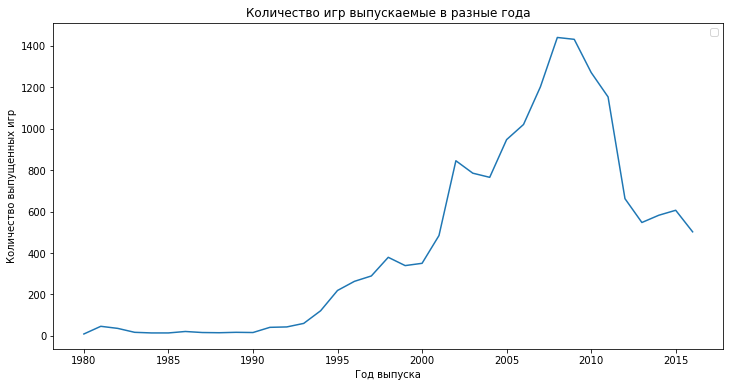

In [28]:
games_on_period = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_on_period)
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')

Из графика видно, что рост популярности на игры начался примерно с 93-94 года. Как раз тогда был релиз PS1, Nintendo 64 и Sega Dreamcast. Рост продолжался до 2010 года, потом случилось перенасыщение рынка и как раз начали массово начали выпускать мобильные игры и приложения

### Как менялись продажи игр по платформам

Text(0, 0.5, 'Количество продаж')

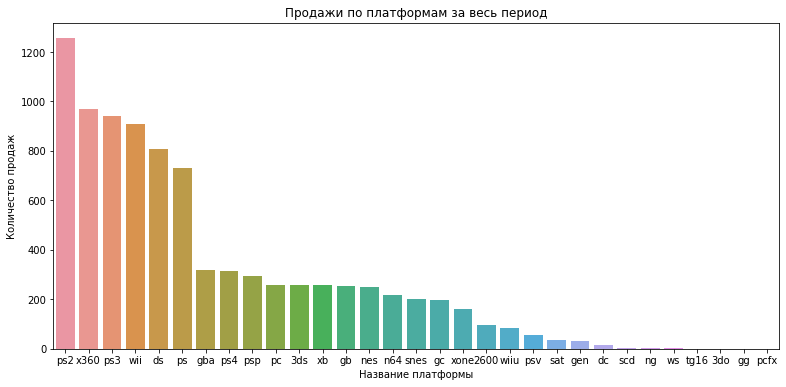

In [29]:
platform_on_sales = games.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Топ 5 платформ - ps2, xbox360, ps3, wii, nintendo ds

In [30]:
top_5_platforms = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)
top_5_platforms

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12


Напишем функцию, которая будет выводить нужную сводную таблицу в разбивке с 2005 года

In [31]:
def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] > 2005)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

И построим таблицу по продажам за 10 лет по нашим топ5 платформам

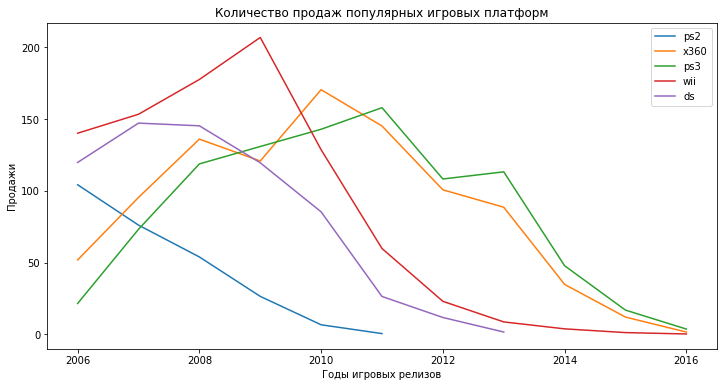

In [32]:
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,games)['total_sales'], label=i)
    plt.legend()

In [33]:
platform_list = games['platform'].unique().tolist()

data = []
first_year = []
for platform in platform_list:
    lifetime = len(games.loc[games['platform'] == platform,'year_of_release'].unique())
    year = games.loc[games['platform'] == platform,'year_of_release'].min()
    data.append(lifetime)
    first_year.append(year)

In [34]:
platform_list = pd.Series(platform_list, name='platform')
data = pd.Series(data, name='lifetime')
first_year = pd.Series(first_year, name='first_year')

platforms_lifetime = pd.concat([platform_list, data, first_year],axis=1)

platforms_lifetime = platforms_lifetime.sort_values(by='lifetime')
platforms_lifetime.sample(5)

,platform,lifetime,first_year
24,scd,2,1993
14,pc,27,1985
2,gb,14,1988
9,ps4,4,2013
3,ds,12,1985


In [35]:
platforms_lifetime['lifetime'].mean()

8.32258064516129

Вывод: у всего есть цикл жизни

In [36]:
platform_grouped = platform_on_sales.reset_index()

In [37]:
top_platforms_list = platform_grouped['platform'].unique()
top_platforms_list

array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'gba', 'ps4', 'psp', 'pc',
       '3ds', 'xb', 'gb', 'nes', 'n64', 'snes', 'gc', 'xone', '2600',
       'wiiu', 'psv', 'sat', 'gen', 'dc', 'scd', 'ng', 'ws', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Составим графики для актуальных платформ на 2016 год:

Text(0.5, 1.0, 'ps4')

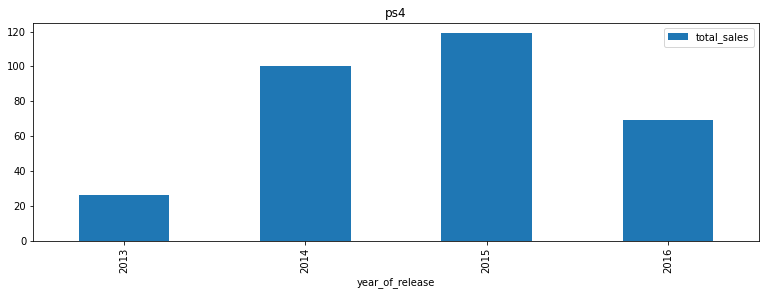

In [38]:
games[games['platform'] == 'ps4'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))
plt.title('ps4')

Text(0.5, 1.0, 'xone')

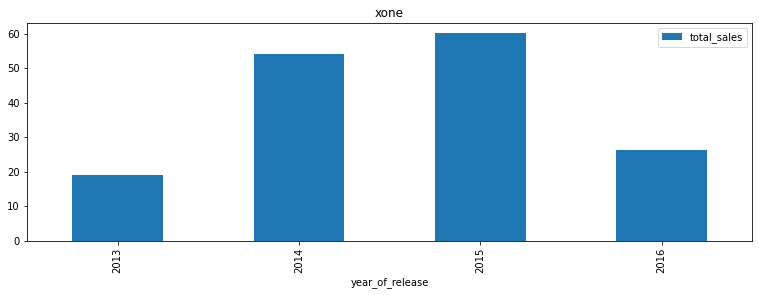

In [39]:
games[games['platform'] == 'xone'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))
plt.title('xone')

Text(0.5, 1.0, 'pc')

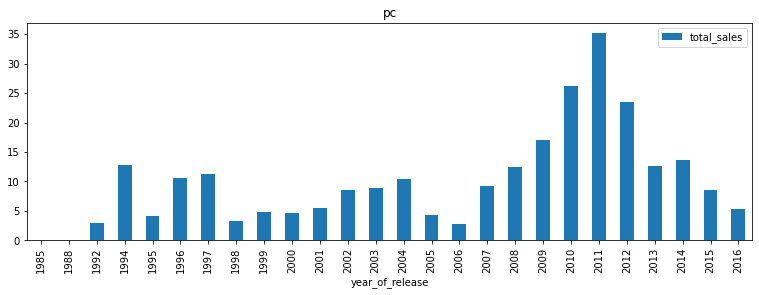

In [40]:
games[games['platform'] == 'pc'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))
plt.title('pc')

Text(0.5, 1.0, 'wiiu')

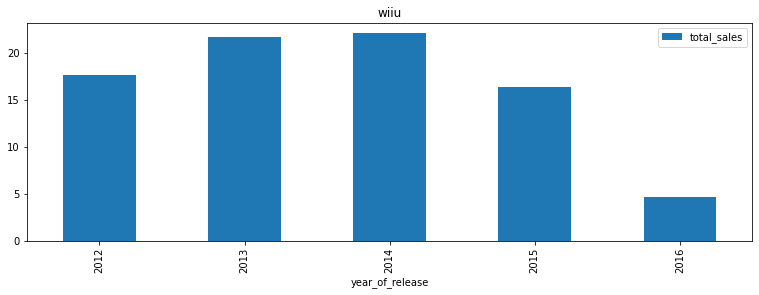

In [41]:
games[games['platform'] == 'wiiu'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))
plt.title('wiiu')

Text(0.5, 1.0, 'psv')

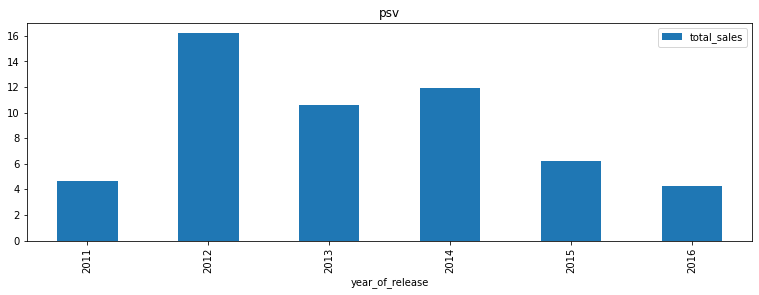

In [42]:
games[games['platform'] == 'psv'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(13,4))
plt.title('psv')

Вывод: По диграммам распределения можно заметить что средний период жизни консолей составляет 7-10 лет. Актуальные платформы на 16 год - PS4, XBox One, Nintendo WII U, PC, Playstation Vita

### Построим ящик с усами

Вся наша исследовательская работа сводится к исследованию последних поколений платформ. Т.к. большинство платформ уже не актуально, а нам необходимо взять только актуальные, возьмём только те платформы, которые имеют спрос и на сегодняшний день. Я выделил PS4, XBox One, Nintendo WII U, PC, Playstation Vita

Для начала создадим переменную games_top_5_platforms, сохраним туда топ 5 платформ и избавимся от выбросов:

In [43]:
actual_period_data = games[games['year_of_release'] > 2013]
actual_period_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [44]:
list_of_top_5 = ['ps4','xone','pc','wiiu','psv']
games_top_5_platforms = actual_period_data[actual_period_data['platform'].isin(['ps4','xone','pc','wiiu','psv'])]
games_top_5_platforms = games_top_5_platforms[games_top_5_platforms['total_sales']<1.4]

Построим ящики:

Text(0, 0.5, 'Глобальные продажи')

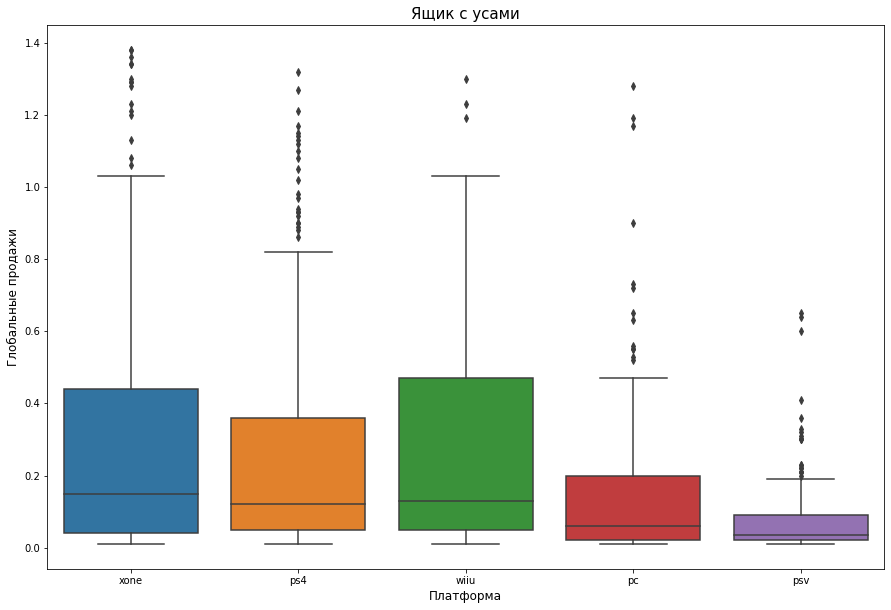

In [45]:
plt.figure(figsize=(15,10))
sns.boxplot(data=games_top_5_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

Из графиков видно, что медиана протекает у всех платформ по-разному и бОльшие продажи имеют xone и wiiu. Немного меньше у ps4

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы

Посмотрим на корреляцию между оценками пользователей и продажами и построим диаграмму рассеивания:

#### PS4

In [46]:
sony_playstation4 = actual_period_data[actual_period_data['platform']=='ps4']
sony_playstation4['user_score'].corr(sony_playstation4['total_sales'])

-0.040131589472697356

Text(0.5, 1.0, 'Диаграмма рассеивания по оценкам пользователей')

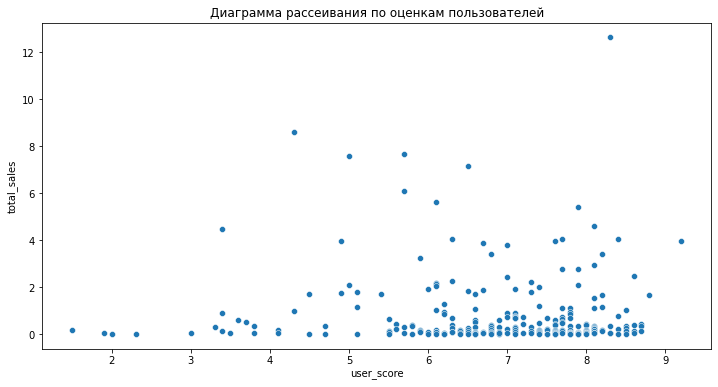

In [47]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_playstation4)
plt.title('Диаграмма рассеивания по оценкам пользователей')

Text(0.5, 1.0, 'Диаграмма рассеивания по оценкам критиков')

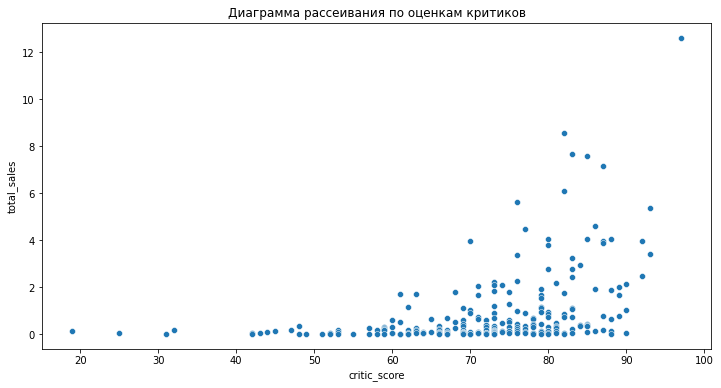

In [48]:
#диаграмма рассеивания по оценкам критиков
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_playstation4)
plt.title('Диаграмма рассеивания по оценкам критиков')

In [49]:
# корреляцию к этой диаграмме
sony_playstation4['critic_score'].corr(sony_playstation4['total_sales'])

0.40266141068104083

Вывод:
 - Корреляция между отзывами критиков и игровой платформой  PS4 : Слабая 0.40656790206178095
 - Корреляция между отзывами пользователей и продажами  PS4 : Очень слабая -0.031957110204556424
 
 Проделаем всё то же самое для других платформ:

#### XBox One

In [50]:
xone = actual_period_data[actual_period_data['platform']=='xone']
xone['user_score'].corr(xone['total_sales'])

-0.0703839280647581

Text(0.5, 1.0, 'Диаграмма рассеивания по оценкам пользователей')

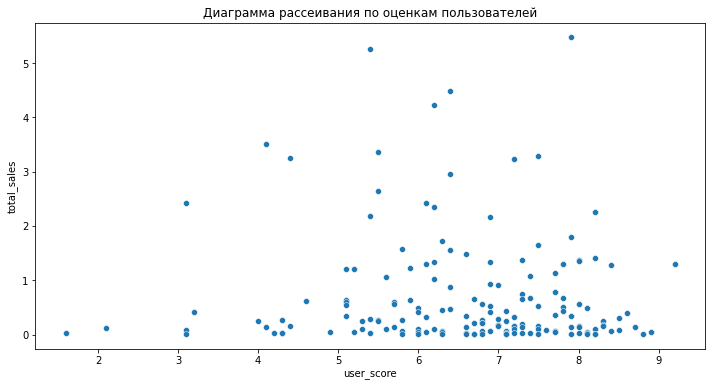

In [51]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=xone)
plt.title('Диаграмма рассеивания по оценкам пользователей')

Text(0.5, 1.0, 'Диаграмма рассеивания по оценкам критиков')

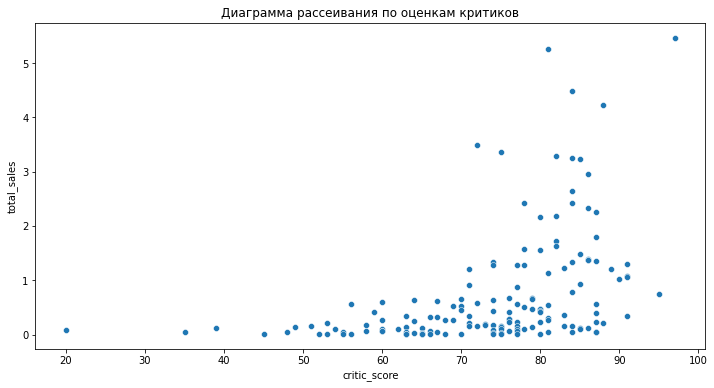

In [52]:
#диаграмма рассеивания по оценкам критиков
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=xone)
plt.title('Диаграмма рассеивания по оценкам критиков')

In [53]:
# корреляцию к этой диаграмме
xone['critic_score'].corr(xone['total_sales'])

0.42867694370333226

Вывод:
 - Корреляция между отзывами критиков и игровой платформой  WII : Слабая 0.4169983280084017
 - Корреляция между отзывами пользователей и продажами  WII : Очень слабая -0.06892505328279414

#### PC

In [54]:
pc = games[games['platform']=='pc']
pc['user_score'].corr(pc['total_sales'])

0.010475684621486417

Text(0.5, 1.0, 'Диаграмма рассеивания по оценкам пользователей')

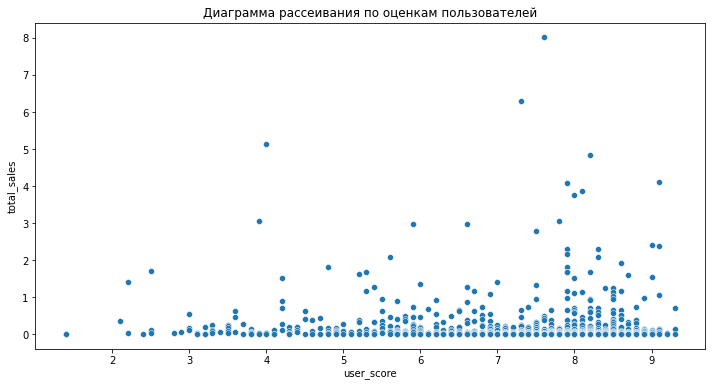

In [55]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=pc)
plt.title('Диаграмма рассеивания по оценкам пользователей')

Text(0.5, 1.0, 'Диаграмма рассеивания по оценкам критиков')

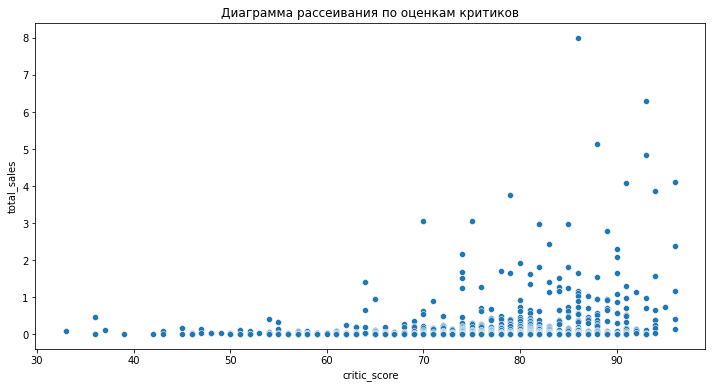

In [56]:
#диаграмма рассеивания по оценкам критиков
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=pc)
plt.title('Диаграмма рассеивания по оценкам критиков')

In [57]:
# корреляцию к этой диаграмме
pc['critic_score'].corr(pc['total_sales'])

0.2568867378948215

Вывод:
 - Корреляция между отзывами критиков и игровой платформой  X360 : Очень слабая 0.2568867378948215
 - Корреляция между отзывами пользователей и продажами  X360 : Очень слабая 0.010475684621486417

#### Playstation Vita

In [58]:
psv = actual_period_data[actual_period_data['platform']=='psv']
psv['user_score'].corr(psv['total_sales'])

-0.16845504978064446

Text(0.5, 1.0, 'Диаграмма рассеивания по оценкам пользователей')

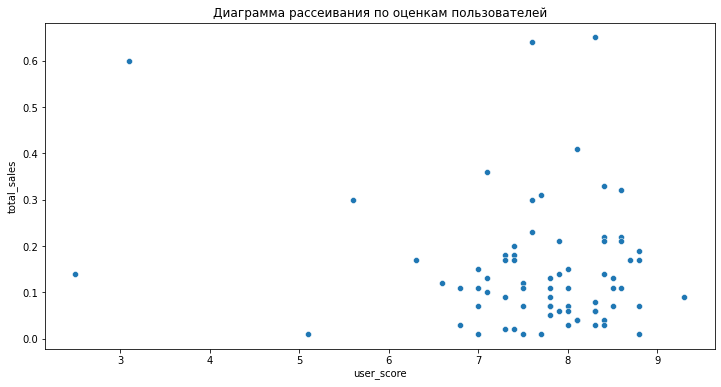

In [59]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=psv)
plt.title('Диаграмма рассеивания по оценкам пользователей')

Text(0.5, 1.0, 'Диаграмма рассеивания по оценкам критиков')

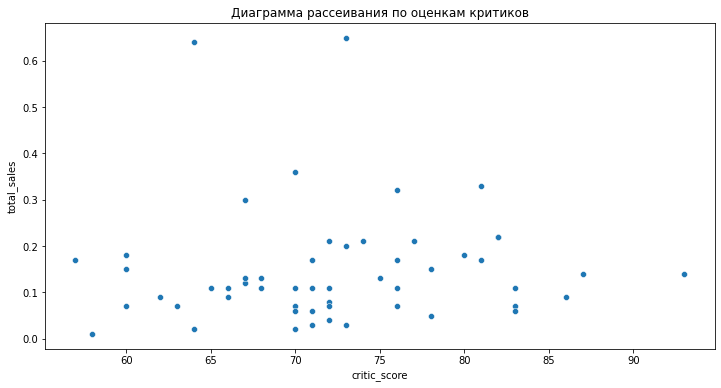

In [60]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=psv)
plt.title('Диаграмма рассеивания по оценкам критиков')

In [61]:
# корреляцию к этой диаграмме
psv['critic_score'].corr(psv['total_sales'])

0.04266490657009526

Вывод:
 - Корреляция между отзывами критиков и игровой платформой  PS3 : Очень слабая 0.1315167215429264
 - Корреляция между отзывами пользователей и продажами  PS3 : Очень слабая 0.013579522883028902

#### Nintendo WII U

In [62]:
wiiu = actual_period_data[actual_period_data['platform']=='wiiu']
wiiu['user_score'].corr(wiiu['total_sales'])

0.40792645792170773

Text(0.5, 1.0, 'Диаграмма рассеивания по оценкам пользователей')

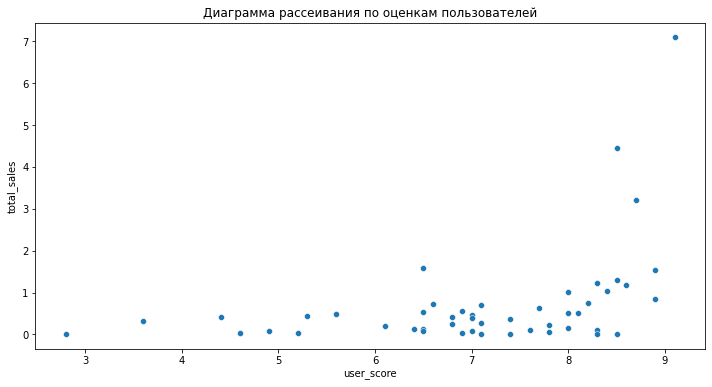

In [63]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=wiiu)
plt.title('Диаграмма рассеивания по оценкам пользователей')

Text(0.5, 1.0, 'Диаграмма рассеивания по оценкам критиков')

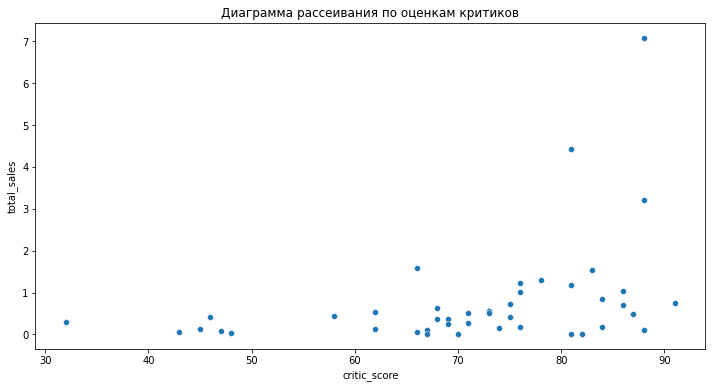

In [64]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=wiiu)
plt.title('Диаграмма рассеивания по оценкам критиков')

In [65]:
# корреляцию к этой диаграмме
wiiu['critic_score'].corr(wiiu['total_sales'])

0.370201412480884

Вывод:
 - Корреляция между отзывами критиков и игровой платформой  DS : Очень слабая 0.34837976012017485
 - Корреляция между отзывами пользователей и продажами  DS : Слабая 0.4002190202148617

Общий Вывод:
 - Практически у всех платформ присутствуем корреляция, между оценками пользователей и критиков к продажам.
 - Оценка пользователей слабо влияет на продажи, чего не скажешь о оценке критиков. Покупатели прислушиваются больше к критикам чем к оценкам других пользователей

### Общее распределение игр по жанрам

Посмотрим на продажи по жанрам:

In [66]:
sales_genre = games.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
sales_genre = sales_genre.reset_index().rename_axis(None, axis=1)
sales_genre

,genre,total_sales
0,action,1744.17
1,sports,1331.27
2,shooter,1052.45
3,role-playing,934.56
4,platform,827.77
5,misc,802.51
6,racing,728.67
7,fighting,447.53
8,simulation,389.97
9,puzzle,242.57


Посмотрим нагляднее:

Text(0, 0.5, 'Продажи')

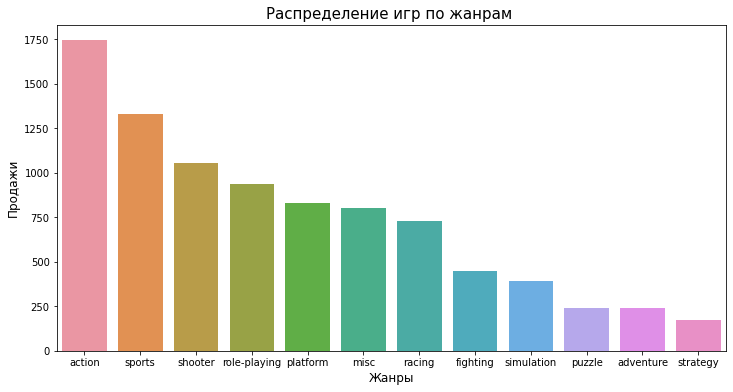

In [67]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=sales_genre, x='genre', y='total_sales')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

Вывод: Лучше всего продаются игры жанра экшн, спорт симуляторы и шутеры. Хуже всего идут стратегии, приключения и паззлы

### Вывод по исследовательскому анализу:

 - Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2010 года. С 2010 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработки игр на игровые платформы;
 - Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS.
 - Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
 - Больше всего продаются игры на Sony Playstation и Xbox 360
 - Nintendo WII как быстро появился также быстро и потух. Возможно потому что появился прям перед выходом мобильных приложений и игр.
 - У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками критиков и продажами. Это значит для людей мнение критиков важнее мнения других пользователей

## Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для начала так же напишем функцию, которая будет возвращать сводную таблицу с долей продаж в регионе и рисовать барплот по платформе, жанру и рейтингу:

In [68]:
def forpivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = games.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n') 
        sns.set_palette("RdBu")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=20)

  platform  na_sales
0     x360    602.47
1      ps2    583.84
2      wii    496.90
3      ps3    393.49
4       ds    382.40



      genre  na_sales
0    action    879.01
1    sports    684.43
2   shooter    592.24
3  platform    445.50
4      misc    407.27



  rating  na_sales
0      e   1295.55
1      t    759.75
2      m    749.74
3   e10+    353.32
4     ec      1.53





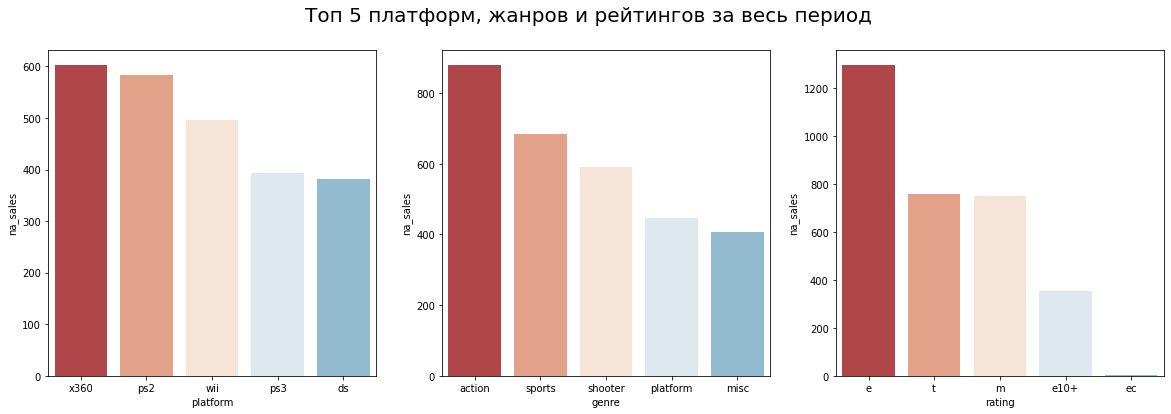

In [69]:
forpivot('na_sales','Топ 5 платформ, жанров и рейтингов за весь период')

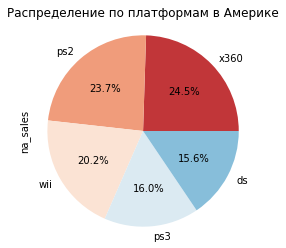

In [70]:
games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='pie', radius = 1.1, autopct='%.1f%%')
plt.title('Распределение по платформам в Америке')
plt.show()

  platform  eu_sales
0      ps2    339.29
1      ps3    330.29
2     x360    270.76
3      wii    262.21
4       ps    213.61



     genre  eu_sales
0   action    519.13
1   sports    376.79
2  shooter    317.34
3   racing    236.51
4     misc    212.74



  rating  eu_sales
0      e    710.52
1      m    484.58
2      t    427.03
3   e10+    188.52
4     ec      0.11





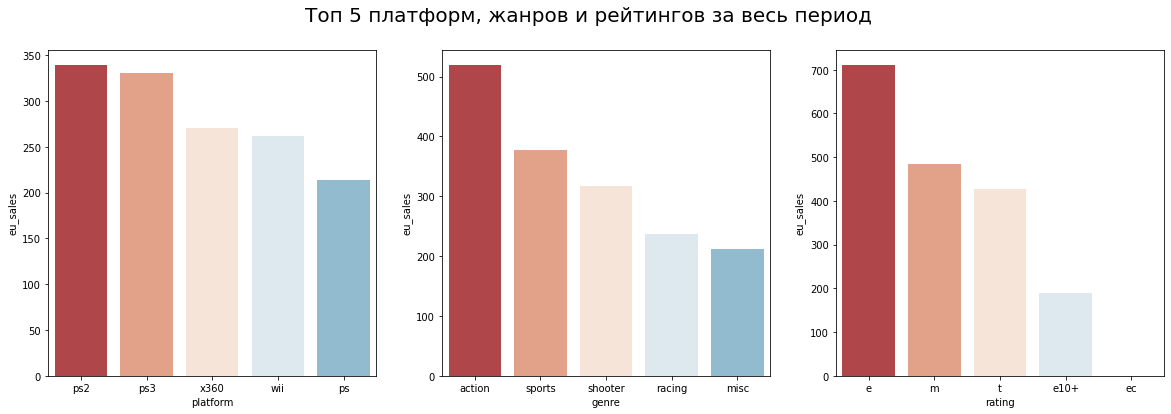

In [71]:
forpivot('eu_sales','Топ 5 платформ, жанров и рейтингов за весь период')

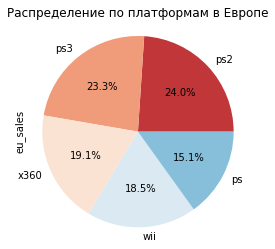

In [72]:
games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='pie', radius = 1.1, autopct='%.1f%%')
plt.title('Распределение по платформам в Европе')
plt.show()

  platform  jp_sales
0       ds    175.57
1       ps    139.82
2      ps2    139.20
3     snes    116.55
4      3ds    100.67



          genre  jp_sales
0  role-playing    355.41
1        action    161.43
2        sports    135.54
3      platform    130.83
4          misc    108.11



  rating  jp_sales
0      e    199.57
1      t    151.40
2      m     64.24
3   e10+     40.20
4     ec      0.00





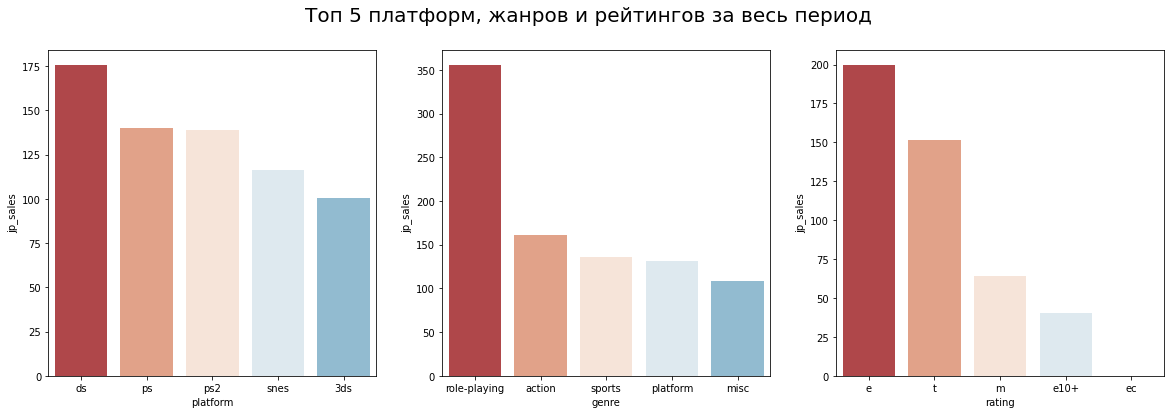

In [73]:
forpivot('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период')

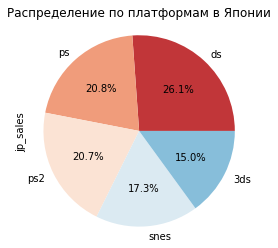

In [74]:
games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='pie', radius = 1.1, autopct='%.1f%%')
plt.title('Распределение по платформам в Японии')
plt.show()

### Вывод

 - В Северной Америке самые популярные консоли XBox360, ps2, Wii, PS3 и DS. Топ 5 жанров в северной америке : action, sports, shooter, platform, misc По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"
 - В Европе любят PS2, PS3, x360, Wii, DS. По жанрам пользуются спросы action, sports, shooter, racing, misc. По рейтингу: на первом месте как и в Америке рейтинг - "для всех". На втором - "от 17 и выше", на третьем - "от 13 и выше"
 - В Японии ценят больше всего DS, PS, PS2, SNES, 3DS. Неимоверной популярностью пользуется жанр role-playing. И с примерно одинаковой популярностью action, sports, platform, misc. По жанрам ситуация как в Америке: больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

## Шаг 5. Проверьте гипотезы

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевые гипотезы:

 - Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Сохраним выборку пользовательского рейтинга за последние 3 года для обеих платформ:

In [75]:
xone_ur = games[(games['platform']=='xone') & (games['year_of_release']>2013)]['user_score']
pc_ur = games[(games['platform']=='pc') & (games['year_of_release']>2013)]['user_score']

И посчитаем среднее:

In [76]:
xone_ur.mean()

6.594545454545454

In [77]:
pc_ur.mean()

6.316260162601626

Для проверки гипотез воспользуемся t-критерием Стьюдента. Зададим альфу 0.01:

In [78]:
alpha = 0.01

results = st.ttest_ind(xone_ur.dropna(), pc_ur.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.13923712043548309
Не получилось отвергнуть нулевую гипотезу


Значение p-value больше alpha. Нулевую гипотезу отвергнуть не получилось. То есть для того чтобы получить различность рейтингов двух платформ - необходимо увеличить доверительный интервал

### Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевые гипотезы:

 - Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
 - Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

Алгоритм такой же:

In [79]:
genre_action_ur = games[(games['genre']=='action') & (games['year_of_release']>2013)]['user_score']
genre_sports_ur = games[(games['genre']=='sports') & (games['year_of_release']>2013)]['user_score']

In [80]:
genre_action_ur.mean()

6.766442953020134

In [81]:
genre_sports_ur.mean()

5.225196850393701

In [82]:
alpha = 0.01

results = st.ttest_ind(genre_action_ur.dropna(), genre_sports_ur.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.658176026869598e-15
Отвергаем нулевую гипотезу


Вывод:
Получив p-value, мы отвергли Нулевую гипотезу. Вероятности получить одинаковые средние рейнтинги по двум жанрам нет.

## Шаг 6. Общий вывод

 - Привели все столбцы к верным типам данных, обработали регистр столбцов и их содержимого;
 - Разобрали аббревиатуру TBD - to be determined и в чем её смысл, провели операции по замене;
 - Определили, что за весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS;
 - Выявили, что оценки критиков и пользователей взаимосвязаны с продажами самих игр. То есть чем больше оценка критиков или пользователей, тем лучше продажа игры.
 - Определили самый популярный жанр за все время это Экшн. На последнем месте стратегии
 - Проверили гипотезы на средние пользовательскте рейтинги двух платформ и двух разных жанров 